In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import os

from dotenv import load_dotenv

load_dotenv()


GROQ_API_KEY  = os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

concept of pydantic , (multilevel check in runtme) ?? pls do it also

In [4]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")

In [5]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START , END

from IPython.display import Image , display

In [6]:
class State(TypedDict):
    topic : str
    joke : str
    improved_joke : str
    final_joke : str

In [7]:
def generate_joke(state):

    """ First LLM Call to generate Jokes """

    response = llm.invoke(f"Write a short joke about { state['topic'] }")

    return {"joke" : response.content}

In [8]:
def check_punchline(state):

    """ Gate Function to check if the joke has a punchline or not """

    if "?" in state['joke'] or "!" in state['joke'] :
        return "Fail"
    
    return "Pass"

In [9]:
def improve_joke(state):

    """ Second LLM CALL to improve the joke """

    response = llm.invoke(f" Make this joke funnier by adding wordplay : {state['joke']} ")

    return { "improved_joke" : response.content}


In [10]:
def polish_joke(state):

    """ Third LLM CALL to polish the joke """

    response = llm.invoke(f" Add a surprising twist to this joke : {state['improved_joke']} ")

    return { "final_joke" : response.content}


In [11]:
graph_builder = StateGraph(State)

graph_builder.add_node( "generate_joke"  , generate_joke)
graph_builder.add_node( "improve_joke"  , improve_joke)
graph_builder.add_node( "polish_joke"  , polish_joke)

graph_builder.add_edge(START , "generate_joke")
graph_builder.add_conditional_edges(
    "generate_joke" ,
    check_punchline,
    {"Fail" : "improve_joke" , "Pass" : END }
)
graph_builder.add_edge( "improve_joke" , "polish_joke" )
graph_builder.add_edge("polish_joke" , END)

graph = graph_builder.compile()

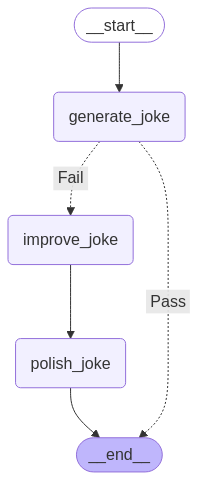

In [12]:
display(
    Image(   
        graph.get_graph().draw_mermaid_png()
    )
)

In [13]:
state = graph.invoke({ "topic" : "Apple"})

In [14]:
state

{'topic': 'Apple',
 'joke': 'Why did the iPhone go to therapy? \n\nBecause it had too many apps-olutely terrible days! \n',
 'improved_joke': "Why did the iPhone go to therapy? \n\nBecause it was feeling **appalled** by its own life! \n\n\nLet me know if you'd like to brainstorm some more punny reasons! 😄 \n",
 'final_joke': "Here's a twist:\n\nWhy did the iPhone go to therapy?  Because it was feeling **appalled** by its own life! \n\n**Twist:** Turns out, the therapist was an Android who was secretly judging its glitchy performance.\n\n\nLet me know if you want to brainstorm more! I'm full of punny ideas! 😄  \n"}

In [15]:
print(state.keys())
print(state['final_joke'])

dict_keys(['topic', 'joke', 'improved_joke', 'final_joke'])
Here's a twist:

Why did the iPhone go to therapy?  Because it was feeling **appalled** by its own life! 

**Twist:** Turns out, the therapist was an Android who was secretly judging its glitchy performance.


Let me know if you want to brainstorm more! I'm full of punny ideas! 😄  



# ASSIGNMENT 

code peer review 

coder -> peer (review) -> Manager (doc string final)

code -> review -> generate test cases -> run the test cases -> analyze the failed test cases -> give summary

In [16]:
# pls do the assignment 

# PARALLELIZATION

With parallelization , LLM works simultaneously on a task.

LLMs can sometimes work simultanously on a task and have their outputs aggregated programmatically.
This worklow parallization manifests in two key variations:

Sectioning : Breaking a task into two independant subtasks run in parallel.

Voting : Running the same task multiple times to get diverse output.




In [17]:
class State(TypedDict):

    topic : str
    joke : str
    poem : str
    story : str
    content : str

In [18]:
def call_for_joke(state : State):
    
    """LLM call for joke """

    response = llm.invoke( f" Write a joke about {state['topic']} " )

    return { "joke" : response.content }

def call_for_poem(state : State):
    
    """LLM call for poem """

    response = llm.invoke( f" Write a poem about {state['topic']} " )

    return { "poem" : response.content }

def call_for_story(state : State):
    
    """LLM call for story """

    response = llm.invoke( f" Write a story about {state['topic']} " )

    return { "story" : response.content }

In [19]:
def aggregator(state):

    """ LLM call for combining poem , joke , story """
    
    response = llm.invoke(

        f" I am providing with you story , poem and joke related to {state['topic']} , pls combiend all into to form a content .Here is the deatils Story : {state['story']} , Poem : {state['poem']} and Joke : {state['joke']}"

    )
    
    return { "content" : response.content }

In [20]:
graph_builder = StateGraph(State)

graph_builder.add_node( "call_for_joke" , call_for_joke )
graph_builder.add_node( "call_for_poem" , call_for_poem )
graph_builder.add_node( "call_for_story" , call_for_story )
graph_builder.add_node("aggregator" , aggregator)

graph_builder.add_edge(START , "call_for_joke")
graph_builder.add_edge(START , "call_for_poem")
graph_builder.add_edge(START , "call_for_story")
graph_builder.add_edge("call_for_joke" , "aggregator")
graph_builder.add_edge("call_for_poem" , "aggregator")
graph_builder.add_edge("call_for_story" , "aggregator")
graph_builder.add_edge("aggregator" , END)

graph = graph_builder.compile()

In [21]:
# display(
#     Image(graph.get_graph().draw_mermaid_png())
# )

In [22]:
state = graph.invoke( {"topic" : "Jaguar"} )

In [23]:
print(state.keys())

dict_keys(['topic', 'joke', 'poem', 'story', 'content'])


In [24]:
state

{'topic': 'Jaguar',
 'joke': "Why did the Jaguar cross the road? \n\nTo prove he wasn't chicken! \n\n\nLet me know if you'd like to hear another one! \n",
 'poem': "A shadow slinks through dappled light,\nA velvet whisper, sleek and bright.\nA flash of gold, a piercing green,\nThe jaguar moves, a silent scene.\n\nThrough jungle depths, a hunter's grace,\nA powerful stride, a haunting face.\nWith spotted coat and eyes that see,\nThe jungle's heart, the wild and free.\n\nA roar that shakes the ancient trees,\nA primal call on moonlit breeze.\nA king of beasts, a hunter bold,\nHis story in the jungle told.\n\nHe stalks his prey with patient might,\nA symphony of stealth and light.\nThen, swift and strong, a blur of speed,\nThe jaguar's power, a primal creed.\n\nRespect his strength, his cunning mind,\nThe jaguar's spirit, one of a kind.\nA symbol wild, a creature rare,\nA whisper of the jungle's lair. \n\n\n",
 'story': 'The air hung heavy with the scent of rain and damp earth. A flash of

# ROUTING

Routing classifies an input and directs it to a specialized followup task. This workflow allows for 
seperation of concerns , and building more specialized prompts . Without this workflow , optimizing 
for one kind of input can hurt performance on other inputs.

When to use this workflow : Routing works well for complex tasks where there are distinct categories that
are better handled seperately , and where classification can be handled accurately either by LLM or more traditional classification model / algorithm 

eg : let say you have to route mail to the tech team , support team or marketing team.

In [ ]:
from typing_extensions import Literal
from pydantic import BaseModel , Field
from langchain_core.messages import HumanMessage , SystemMessage

#schema for structured output to use as a routing logic
class Route(BaseModel):
    step : Literal["pome" , "story" , "joke"] = Field(
        default = None , description = "The next step in the routing process"
    )

# Augment the llm with schema for structured output
router = llm.with_structured_output(Route)

# State
class State(TypedDict):
    input : str
    decision : str
    output : str

# Nodes
def llm_call_story(state : State):
    "Write a story" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }

def llm_call_joke(state : State):
    "Write a joke" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }

def llm_call_poem(state : State):
    "Write a poem" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }


In [27]:
def llm_call_router(state : State):
    "Route the input to the apprpriate node"

    decision = router.invoke(
        [
            SystemMessage(
                content = "Route the input to story,joke , or poem based on the user's request"
            ),
            HumanMessage(content=state["input"])
        ]
    )

    return {"decision" : decision.step}


In [28]:
# Conditional edge function route to the appropriate node
def route_decision(state : State):
    "Return the node name you want to visit next"
    if state["decision"] == "story":
        return "llm_call_story"
    elif state["decision"] == "poem":
        return "llm_call_poem"
    else:
        return "llm_call_joke"

In [30]:
router_builder = StateGraph(State)

router_builder.add_node("llm_call_joke" , llm_call_joke)
router_builder.add_node("llm_call_story" , llm_call_story)
router_builder.add_node("llm_call_poem" , llm_call_poem)
router_builder.add_node("llm_call_router" , llm_call_router)

router_builder.add_edge(START , "llm_call_router")
router_builder.add_conditional_edges(
    "llm_call_router",route_decision,
    {
        # Name returned by route decision : name of next node to visit
        "llm_call_story" : "llm_call_story" ,
        "llm_call_poem" : "llm_call_poem" ,
        "llm_call_joke" : "llm_call_joke"
    }
)

router_builder.add_edge("llm_call_joke" , END)
router_builder.add_edge("llm_call_poem" , END)
router_builder.add_edge("llm_call_story" , END)

In [40]:
router_graph = router_builder.compile()

In [43]:
# display(
#     Image(router_graph.get_graph().draw_mermaid_png())
# )

In [44]:
state = router_graph.invoke({"input" : "Write a joke about cats"})
print(state["output"])

Why don't cats play poker in the jungle? 

Too many cheetahs! 😹  



# Orchestrator - Worker

In the orchestrator-worker's workflow , a central LLM dynamically breaks down tasks , delegates them to worker LLMS , and synthesize their results.

When to use this workflow : This workflow is well suited for complex tasks where you can't predict the subtasks needed.
(in coding , for example the number of files that need to be changed and the nature of change in each file likely depend on the task). Where it's topographically similar , the key differences from parallelization is its flexibility-subtasks are not predefined , but determined by orchestrator based on the specifi input.

orchestrator (break down the task into subtask )-> subtask -> Synthesizer (combine all the task)

In [45]:
from typing import Annotated , List
import operator

class Section(BaseModel):
    name : str = Field(
        description="Name for this section of the report"
    )
    description : str = Field(
        description="Brief overview of the main topics and concepts to be covered in this section"
    )

class Sections(BaseModel):
    sections : List[Section] = Field(
        description="Sections of the report"
    )

planner = llm.with_structured_output(Sections)

# Creating Workers in LangGraph

Because Orchestrator-worker workflows are common , LangGraph has the SEND Api to support this. It lets you dynamically 
create worker nodes and send each one a specific input . Each worker has its own state , and all workers output are written to a shared state key that is accessible to the orchestrator graph . This gives the orchestrator access to all 
worker output and allows it to synthesize them into a final output.As you can see below , we iterate over a list of sections and send each to a Worker node.

In [46]:
from langgraph.constants import Send

# Graph state 
class State(TypedDict):
    topic : str # Report topic
    sections : list[Section] # List of report sections
    completed_sections : Annotated[
        list , operator.add
    ] # all workers write to this key in parallel
    final_report : str # Final report

# Worker State 
class WorkerState(TypedDict):
    section : Section
    completed_sections : Annotated[ list , operator.add ]

In [49]:
# Nodes

def orchestrator(satte : State):

    """Orchestrator that generates a plan for the report"""

    # Generate queries
    report_sections = planner.invoke(
        [
            SystemMessage(content="Generate a plan for the report"),
            HumanMessage(content=f"Here is the report topic : { state['topic'] }" ) 
        ]
    )

    return { "sections" : report_sections.sections}

In [51]:
def llm_call(state : WorkerState):

    """Worker writes a section of the report"""

    # Generate section

    section = llm.invoke(
        [

            SystemMessage(content = " Write a report section following the provided name and description.Includes no preamble for each section"),
            HumanMessage(content=f"Here is the section name : {state['section'].name} and description {state['section'].description} ")

        ]
    )

    return {"completed_section" : [section.content]}


In [52]:
def synthesizer(state : State):

    "Synthesize full report from sections"

    # list of completed sections
    completed_sections = state["completed_sections"]

    # Format completed sections to str to use as context for final sections
    completed_report_sections = "\n\n--\n\n".join(completed_sections)

    return {"final_report" : completed_report_sections}


In [ ]:
# Conditional edge function to create llm_call workers that each write a section of the report
def assign_workers(state : State):

    "Assign a worker to each section in the plan"

    # kick-off section writing in parallel via SEND() API

    return [ Send ("llm_call" , {"section" : s} ) for s in state["sections"]  ]